In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#load dataset
df = pd.read_csv('insurance.csv')

## Exploratory Data Analysis

In [3]:
#first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#descriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#number of unique values in each column
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
#check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd6fd50>,
      dtype=object)

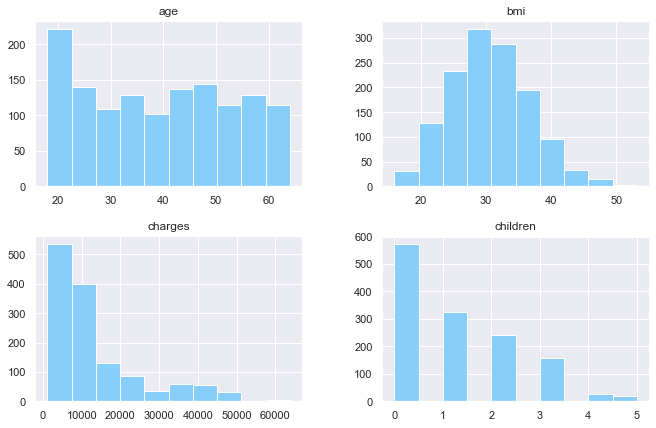

In [7]:
#frequency distribution of numeric data
df.hist(figsize=(11,7),color='lightskyblue')

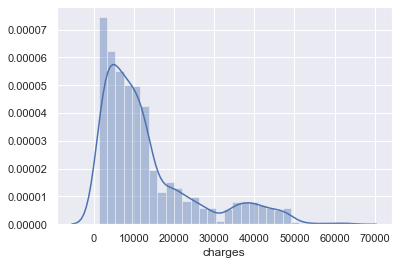

In [8]:
#histogram of target 'charges'
sns.distplot(df['charges'])

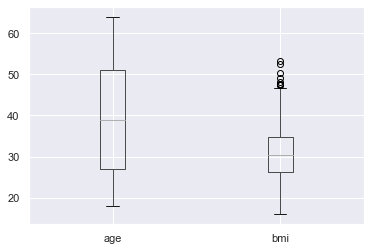

In [9]:
#age and bmi boxplot
df.boxplot(column = ['age','bmi'])

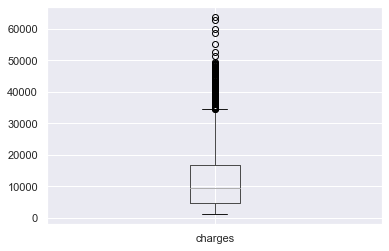

In [10]:
#median value in charges column is ~10,000
df.boxplot(column = ['charges'])

In [11]:
#correlation
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


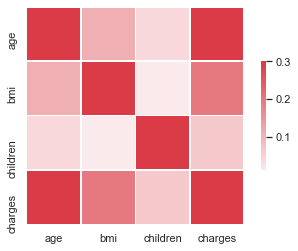

In [12]:
#heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
#data info - look at cat data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Count plot for sex


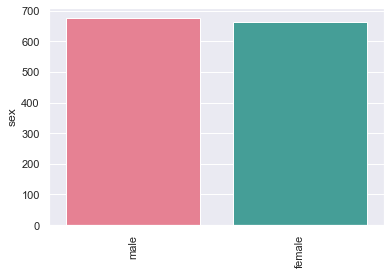

Count plot for smoker


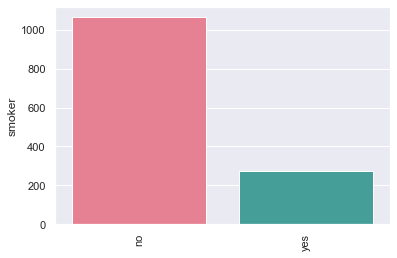

Count plot for region


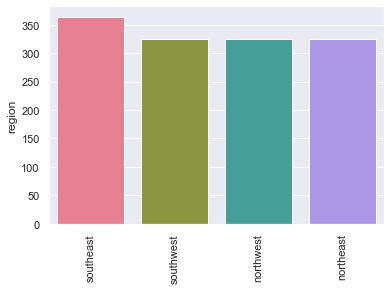

In [14]:
#plot value count categorical data
df_cat = df[['sex','smoker','region']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Count plot for %s" % (i))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette='husl')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [15]:
#pivot table sex vs charges
pd.pivot_table(df, index = 'sex', values = 'charges')

,charges
sex,
female,12569.578844
male,13956.751178


sex           female          male
smoker                            
no       8762.297300   8087.204731
yes     30678.996276  33042.005975


Text(0, 0.5, 'Charges')

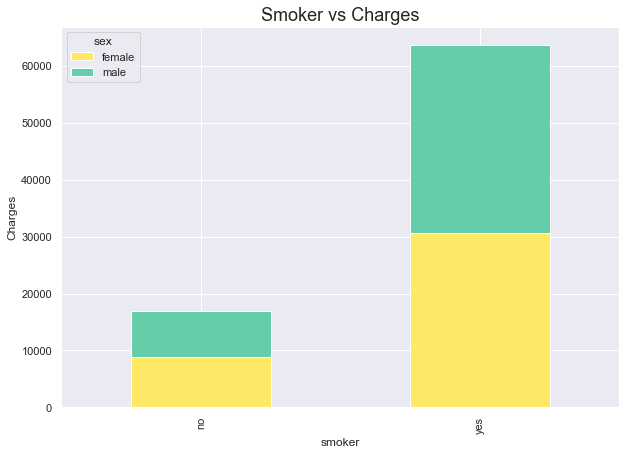

In [16]:
#pivot table smoker vs charges separated by gender
colors=['#ffe866', 'mediumaquamarine']
piv=pd.pivot_table(df, index = 'smoker', columns='sex', values = 'charges')
print(piv)
piv.loc[:,["female","male"]].plot.bar(stacked=True,figsize=(10,7),color=colors)
plt.title('Smoker vs Charges',fontsize=18)
plt.ylabel('Charges')

Text(0.5, 1.0, 'Distribution of Charges')

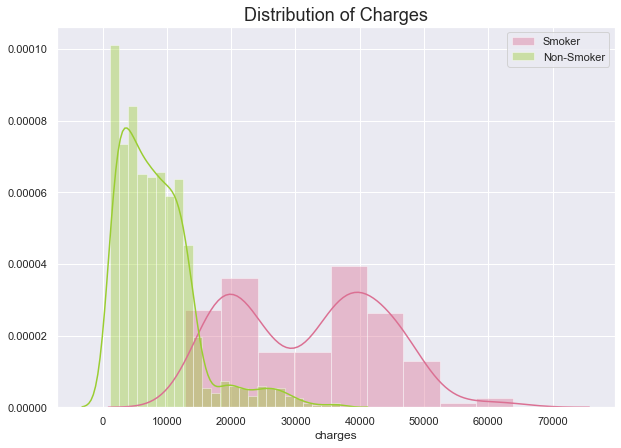

In [17]:
#Distribution of Charges by smokers
plt.figure(figsize=(10,7))
ax=sns.distplot(df[df.smoker=='yes']['charges'],color='palevioletred',label='Smoker')
ax=sns.distplot(df[df.smoker=='no']['charges'],color='yellowgreen',label='Non-Smoker')
ax.legend()
plt.title('Distribution of Charges',fontsize=18)

smoker              no           yes
region                              
southwest  8019.284513  32269.063494
southeast  8032.216309  34844.996824
northwest  8556.463715  30192.003182
northeast  9165.531672  29673.536473


Text(0, 0.5, 'Charges')

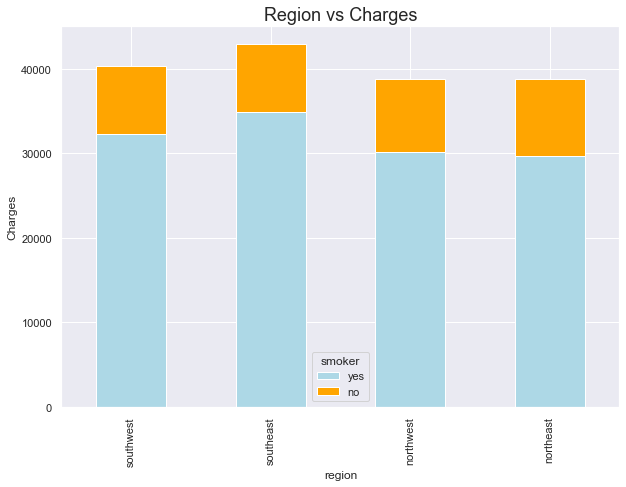

In [18]:
#plot region vs region separated by smoker/nonsmoker
colors=['lightblue','orange']
piv2=pd.pivot_table(df, index = 'region', columns='smoker', values = 'charges').sort_values('region', ascending = False)
print(piv2)
piv2.loc[:,['yes','no']].plot.bar(stacked=True, figsize=(10,7), color=colors)
plt.title('Region vs Charges', fontsize=18)
plt.ylabel('Charges')

In [19]:
#look at numerical data
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Text(0.5, 1, 'Age vs Charges')

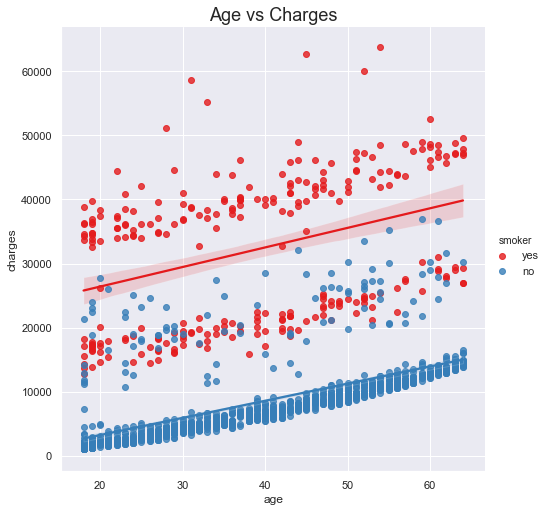

In [20]:
#plot age vs charges separated by sex
sns.lmplot('age', 'charges',data=df, hue='smoker',height=7, palette='Set1')
plt.title('Age vs Charges', fontsize=18)

Text(0.5, 1, 'BMI vs Charges')

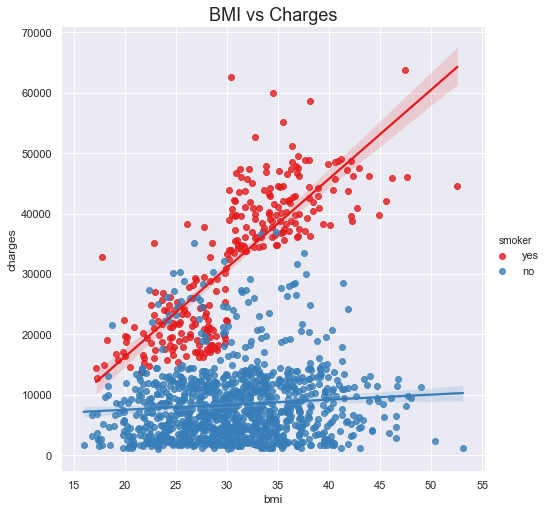

In [21]:
#plot bmi with charges separated by sex
sns.lmplot('bmi','charges',data=df, hue='smoker',height=7, palette='Set1')
plt.title('BMI vs Charges',fontsize=18)

Text(0.5, 1, 'Age vs BMI')

<Figure size 576x432 with 0 Axes>

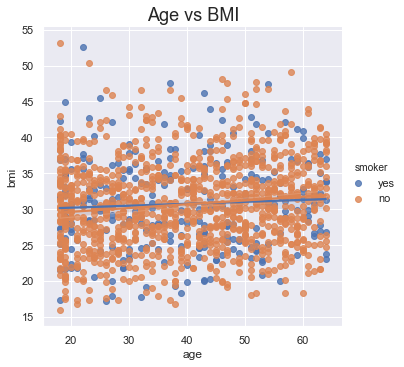

In [22]:
#plot age vs bmi
plt.figure(figsize=(8,6))
sns.lmplot('age','bmi',data=df,hue='smoker')
plt.title('Age vs BMI',fontsize=18)

In [23]:
#pd.options.display.max_rows
#pd.set_option('display.max_rows', None)

Text(0.5, 1.0, 'Children vs Charges')

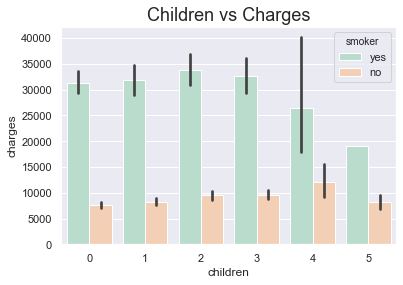

In [24]:
#plot children vs charges
sns.barplot('children','charges',hue='smoker', data=df, palette='Pastel2')
plt.title('Children vs Charges', fontsize=18)

Text(0.5, 1.0, 'Value Count of Children')

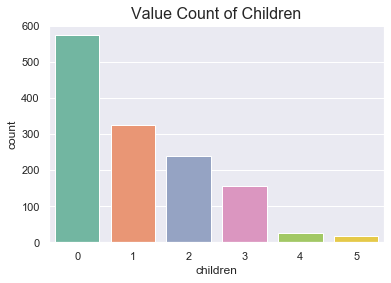

In [25]:
#plot children count
sns.countplot('children',data=df,palette='Set2')
plt.title('Value Count of Children', fontsize=16)

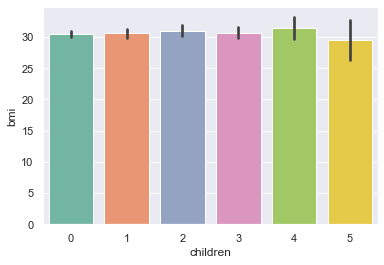

In [26]:
#plot children vs bmi
sns.barplot('children','bmi',data=df,palette="Set2")

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Feature Engineering

In [28]:
#create function to categorize bmi values
def bmi_func(bmi):
    if bmi <= 18.6:
        return 'underweight'
    elif bmi >= 18.5 and bmi<24.9:
        return 'normal'
    elif bmi >= 25 and bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'     

In [29]:
#test function
bmi_func(33)

'obese'

In [30]:
#create new column to put bmi into categories
df['bmi_cat'] = df.bmi.apply(bmi_func)

In [31]:
#check to see if new column is accurate
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


Text(0.5, 1.0, 'BMI Categories Count Plot')

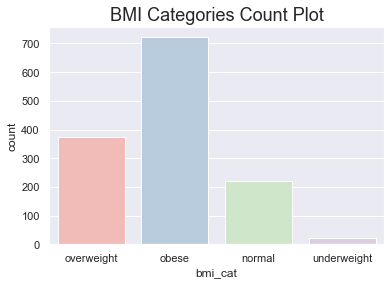

In [32]:
#value count of bmi_cat
sns.countplot('bmi_cat',data=df,palette="Pastel1")
plt.title("BMI Categories Count Plot",fontsize=18)

Text(0.5, 1.0, 'BMI categories vs Charges')

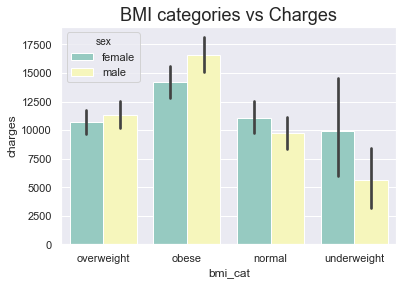

In [33]:
#plot bmi_cat vs charges
sns.barplot('bmi_cat','charges',hue='sex',data=df,palette="Set3")
plt.title('BMI categories vs Charges',fontsize=18)

In [34]:
#create function to categorize age groups

def age_func(age):
    if age >= 1 and age < 12:
        return 'child'
    elif age >= 12 and age < 20:
        return 'youth'
    elif age >= 20 and age < 45:
        return 'adult'
    elif age >= 45 and age < 65:
        return 'middle_age'
    else:
        return 'senior'

In [35]:
#test age_func function
age_func(63)

'middle_age'

In [36]:
#create new column ['age_cat'] to put age into categories
df['age_cat'] = df.age.apply(age_func)

In [37]:
#check to see age_cat label is accurate
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,bmi_cat,age_cat
873,43,male,30.100,1,no,southwest,6849.02600,obese,adult
366,56,female,32.300,3,no,northeast,13430.26500,obese,middle_age
897,19,male,25.555,1,no,northwest,2221.56445,overweight,youth
522,51,female,33.915,0,no,northeast,9866.30485,obese,middle_age
509,57,female,28.700,0,no,southwest,11455.28000,overweight,middle_age
2,28,male,33.000,3,no,southeast,4449.46200,obese,adult
40,24,female,26.600,0,no,northeast,3046.06200,overweight,adult
459,40,female,33.000,3,no,southeast,7682.67000,obese,adult
919,35,female,34.210,1,no,southeast,5245.22690,obese,adult
554,25,female,41.325,0,no,northeast,17878.90068,obese,adult


In [38]:
#get min and max age values
df.age.agg(['min','max'])

min    18
max    64
Name: age, dtype: int64

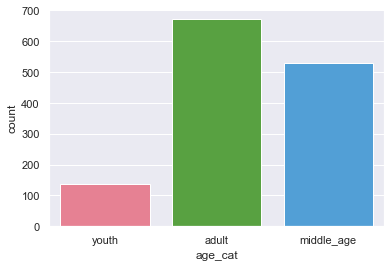

In [39]:
#plot value counts of age_cat
sns.countplot('age_cat',data=df,palette='husl')

## Data Preprocessing

In [40]:
#get dummy data
dfdummy = pd.get_dummies(df)

In [41]:
#first 5 rows of dummy data
dfdummy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_cat_normal,bmi_cat_obese,bmi_cat_overweight,bmi_cat_underweight,age_cat_adult,age_cat_middle_age,age_cat_youth
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0


In [42]:
#make sure all columns have numerical dtype
dfdummy.dtypes

age                      int64
bmi                    float64
children                 int64
charges                float64
sex_female               uint8
sex_male                 uint8
smoker_no                uint8
smoker_yes               uint8
region_northeast         uint8
region_northwest         uint8
region_southeast         uint8
region_southwest         uint8
bmi_cat_normal           uint8
bmi_cat_obese            uint8
bmi_cat_overweight       uint8
bmi_cat_underweight      uint8
age_cat_adult            uint8
age_cat_middle_age       uint8
age_cat_youth            uint8
dtype: object

In [43]:
dfdummy.shape

(1338, 19)